# Task 4. Algorithms for unconstrained nonlinear optimization. Stochastic and metaheuristic algorithms

Goal

The use of stochastic and metaheuristic algorithms (Simulated Annealing, Differential Evolution, Particle Swarm Optimization) in the tasks of unconstrained nonlinear optimization and the experimental comparison of them with Nelder-Mead and Levenberg-Marquardt algorithms

# Task I

In [ ]:
pip install pyswarm

In [36]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from scipy.optimize import dual_annealing
from scipy.optimize import differential_evolution
from scipy.optimize import differential_evolution
from pyswarm import pso
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [3]:
#Generate data
np.random.seed(0)

def f(x):
    return 1 / (x**2 - 3*x + 2)

# Generate x_k and y_k
x_k = np.linspace(0, 3, 1001)
delta_k = np.random.normal(0, 1, 1001)

y_k = np.zeros_like(x_k)

for i in range(len(x_k)):
    val = f(x_k[i])
    delta = delta_k[i]
    
    if val < -100:
        y_k[i] = -100 + delta
    elif -100 <= val <= 100:
        y_k[i] = val + delta
    else:
        y_k[i] = 100 + delta

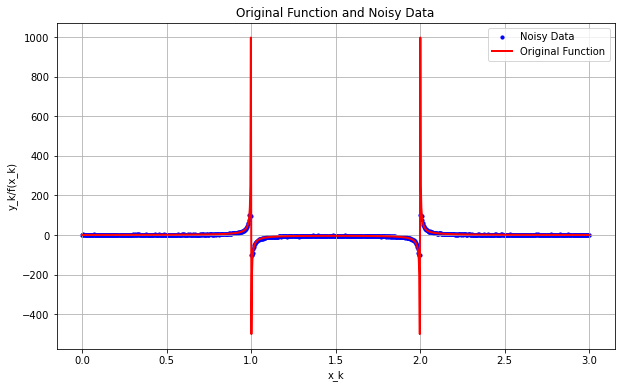

In [3]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x_k, y_k, s=10, label='Noisy Data', color='blue')
plt.plot(x_k, f(x_k), 'r', label='Original Function', linewidth=2)
plt.title('Original Function and Noisy Data')
plt.xlabel('x_k')
plt.ylabel('y_k/f(x_k)')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
#Rational and Loss functions
def rational_function(x, a, b, c, d):
    return (a*x + b) / (x**2 + c*x + d)

def objective_function(params, x, y):
    a, b, c, d = params
    return np.sum((rational_function(x, a, b, c, d) - y)**2)

# Nelder-Mead algorithm

In [5]:
initial_guess = [1, 1, 1, 1]

result_rational_nm = minimize(objective_function, initial_guess, args=(x_k, y_k), method='Nelder-Mead', options={'maxiter': 1000, 'xatol': 0.001, 'fatol': 0.001})

a_rational_nm, b_rational_nm, c_rational_nm, d_rational_nm = result_rational_nm.x
iterations_count_rational_nm = result_rational_nm.nit
f_calc_rational_nm = result_rational_nm.nfev

print("Optimized Coefficients:")
print("a =", a_rational_nm)
print("b =", b_rational_nm)
print("c =", c_rational_nm)
print("d =", d_rational_nm)
print("Number of Iterations:", iterations_count_rational_nm)
print("Number of Function Evaluations:", f_calc_rational_nm)

Optimized Coefficients:
a = -1.0037899522056806
b = 1.0042465156214746
c = -2.0008915414766455
d = 1.000907615020115
Number of Iterations: 445
Number of Function Evaluations: 749


# Levenberg-Marquardt algorithm

In [6]:
#This method doesnt produce number of iterations or number of function evaluations, so I will use least_squares instead
initial_guess = [1, 1, 1, 1]

popt, pcov = curve_fit(rational_function, x_k, y_k, p0=initial_guess, method='lm', maxfev=1000)

a_rational_lm, b_rational_lm, c_rational_lm, d_rational_lm = popt

print("Optimized Coefficients:")
print("a =", a_rational_lm)
print("b =", b_rational_lm)
print("c =", c_rational_lm)
print("d =", d_rational_lm)

Optimized Coefficients:
a = -1.0041582092044314
b = 1.004593437316376
c = -2.000807871927095
d = 1.000823922748976


In [7]:
def residuals(params, x, y):
    a, b, c, d = params
    return y - rational_function(x, a, b, c, d)

initial_guess = [1, 1, 1, 1]

result = least_squares(residuals, initial_guess, args=(x_k, y_k), method='lm', max_nfev=1000)

a_rational_lm, b_rational_lm, c_rational_lm, d_rational_lm = result.x

print("Optimized Coefficients:")
print("a =", a_rational_lm)
print("b =", b_rational_lm)
print("c =", c_rational_lm)
print("d =", d_rational_lm)

print("\nNumber of iterations:", result.njev)
print("Number of function evaluations:", result.nfev)

Optimized Coefficients:
a = -1.0022335727584746
b = 1.002665411842137
c = -2.000797878344446
d = 1.0008138559974

Number of iterations: None
Number of function evaluations: 159


# Simulated Annealing

In [8]:
def objective_function(params):
    a, b, c, d = params
    return np.sum((rational_function(x_k, a, b, c, d) - y_k) ** 2)

bounds = [(-3, 3)] * 4

result = dual_annealing(objective_function, bounds, maxiter=1000, seed=42)

a_rational_sa = result.x[0]
b_rational_sa = result.x[1]
c_rational_sa = result.x[2]
d_rational_sa = result.x[3]
iterations_count_rational_sa = result.nit
f_calc_rational_sa = result.nfev

print("Optimized Coefficients:")
print("a =", a_rational_sa)
print("b =", b_rational_sa)
print("c =", c_rational_sa)
print("d =", d_rational_sa)
print("Number of Iterations:", iterations_count_rational_sa)
print("Number of Function Evaluations:", f_calc_rational_sa)

Optimized Coefficients:
a = -1.003597960556013
b = 1.0040547573150738
c = -2.000891992278374
d = 1.0009080582078207
Number of Iterations: 1000
Number of Function Evaluations: 8976


# Differential Evolution

In [9]:
bounds = [(-3, 3)] * 4
result = differential_evolution(objective_function, bounds, maxiter=1000, tol=0.001, seed=42)

a_rational_de = result.x[0]
b_rational_de = result.x[1]
c_rational_de = result.x[2]
d_rational_de = result.x[3]
iterations_count_rational_de = result.nit
f_calc_rational_de = result.nfev

print("Optimized Coefficients:")
print("a =", a_rational_de)
print("b =", b_rational_de)
print("c =", c_rational_de)
print("d =", d_rational_de)
print("Number of Iterations:", iterations_count_rational_de)
print("Number of Function Evaluations:", f_calc_rational_de)

Optimized Coefficients:
a = -1.021298259993223
b = 1.0217700769679408
c = -2.0008970263471024
d = 1.000913708198315
Number of Iterations: 127
Number of Function Evaluations: 7750


# Plotting together

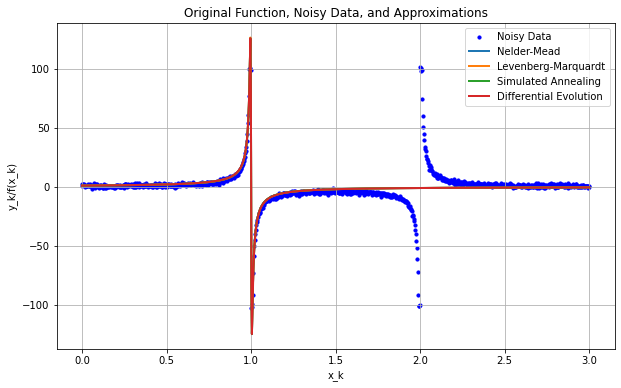

In [14]:
plt.figure(figsize=(10, 6))

plt.scatter(x_k, y_k, s=10, label='Noisy Data', color='blue')
#plt.plot(x_k, f(x_k), 'r', label='Original Function', linewidth=2)

plt.plot(x_k, rational_function(x_k, a_rational_nm, b_rational_nm, c_rational_nm, d_rational_nm), label='Nelder-Mead', linewidth=2)
plt.plot(x_k, rational_function(x_k, a_rational_lm, b_rational_lm, c_rational_lm, d_rational_lm), label='Levenberg-Marquardt', linewidth=2)
plt.plot(x_k, rational_function(x_k, a_rational_sa, b_rational_sa, c_rational_sa, d_rational_sa), label='Simulated Annealing', linewidth=2)
plt.plot(x_k, rational_function(x_k, a_rational_de, b_rational_de, c_rational_de, d_rational_de), label='Differential Evolution', linewidth=2)
#plt.plot(x_k, rational_function(x_k, a_rational_pso, b_rational_pso, c_rational_pso, d_rational_pso), label='Particle Swarm Optimization', linewidth=2)

plt.title('Original Function, Noisy Data, and Approximations')
plt.xlabel('x_k')
plt.ylabel('y_k/f(x_k)')
plt.legend()
plt.grid(True)

plt.show()

# Task II

Choose at least 15 cities in the world having land transport connections between them. Calculate the distance matrix for them and then apply the Simulated Annealing method to solve the corresponding Travelling Salesman Problem. Visualize the results at the first and the last iteration.

In [50]:
import random
import matplotlib.pyplot as plt
random.seed(3)

In [51]:
# USed the dataset from https://people.sc.fsu.edu/~jburkardt/datasets/cities/cities.html
# USCAP describes the location of the 50 US state capitals
# the (X,Y) coordinates of each capital using a cylindrical projection.
# Choose 15 of them randomly

#Change to your path
filename_coord = "uscap_xy.txt"
filename_city = "uscap_name.txt"

all_coordinates = []
with open(filename_coord, "r") as file:
    for line in file:
        x, y = map(float, line.split())
        all_coordinates.append((x, y))

city_names = []
with open(filename_city, 'r') as file:
    city_names = [line.strip() for line in file.readlines()]

# Randomly choose 15 cities
selected_indices = random.sample(range(len(city_names)), 15)
selected_cities = [city_names[i] for i in selected_indices]
coordinates = [all_coordinates[i] for i in selected_indices]

print("Selected cities:")
print(selected_cities)
# No Hawaii and Alaska -- so land transportation exists

Selected cities:
['Topeka, Kansas', 'Harrisburg, Pennsylvania', 'Columbus, Ohio', 'Tallahassee, Florida', 'Jackson, Mississippi', 'Providence, Rhode Island', 'Santa Fe, New Mexico', 'Pierre, South Dakota', 'Cheyenne, Wyoming', 'Sacramento, California', 'Richmond, Virginia', 'Montgomery, Alabama', 'Montpelier, Vermont', 'Frankfort, Kentucky', 'Oklahoma City, Oklahoma']


In [52]:
# Calc distance
def calculate_distance(point1, point2):
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**0.5

n = len(coordinates)
distance_matrix = [[0] * n for _ in range(n)]

for i in range(n):
    for j in range(i+1, n):
        distance = calculate_distance(coordinates[i], coordinates[j])
        distance_matrix[i][j] = distance_matrix[j][i] = distance
        

In [53]:
#Simulated annealing

def simulated_annealing(distance_matrix, temperature, cooling_rate):
    n = len(distance_matrix)
    current_solution = list(range(n))
    
    # Include the distance back to the starting city
    current_distance = sum(distance_matrix[current_solution[i]][current_solution[(i + 1) % n]] for i in range(n))
    
    best_solution = current_solution
    best_distance = current_distance
    
    iteration_count = 0
    
    while temperature > 1:
        i, j = random.sample(range(n), 2)
        new_solution = current_solution.copy()
        new_solution[i], new_solution[j] = new_solution[j], new_solution[i]
        
        # Include the distance back to the starting city
        new_distance = sum(distance_matrix[new_solution[i]][new_solution[(i + 1) % n]] for i in range(n))
        
        if new_distance < current_distance or random.random() < (1 / (1 + temperature)):
            current_solution = new_solution
            current_distance = new_distance
            
            if current_distance < best_distance:
                best_solution = current_solution
                best_distance = current_distance
        
        temperature *= cooling_rate
        
        iteration_count += 1
    
    return best_solution, best_distance, iteration_count

Initial Distance: 16082.49


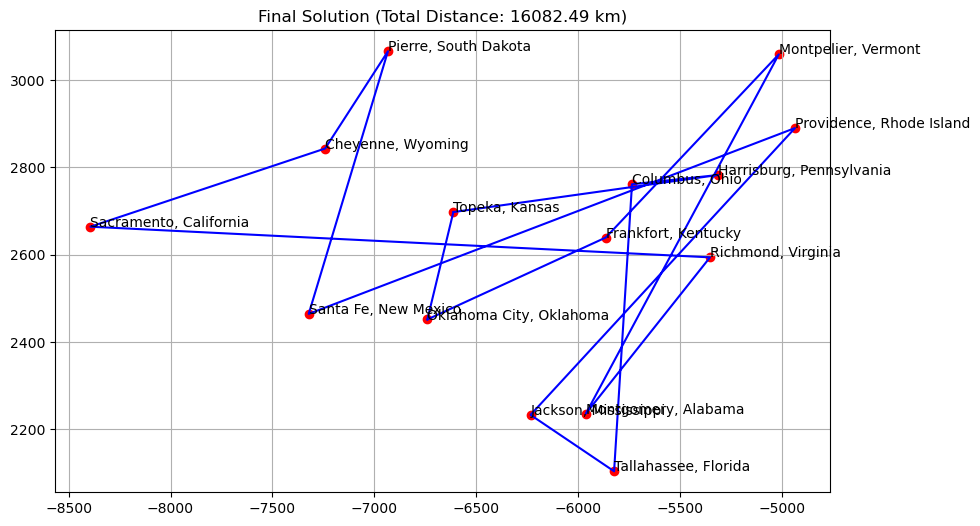

Final Distance: 7878.71
Number of iterations: 1838


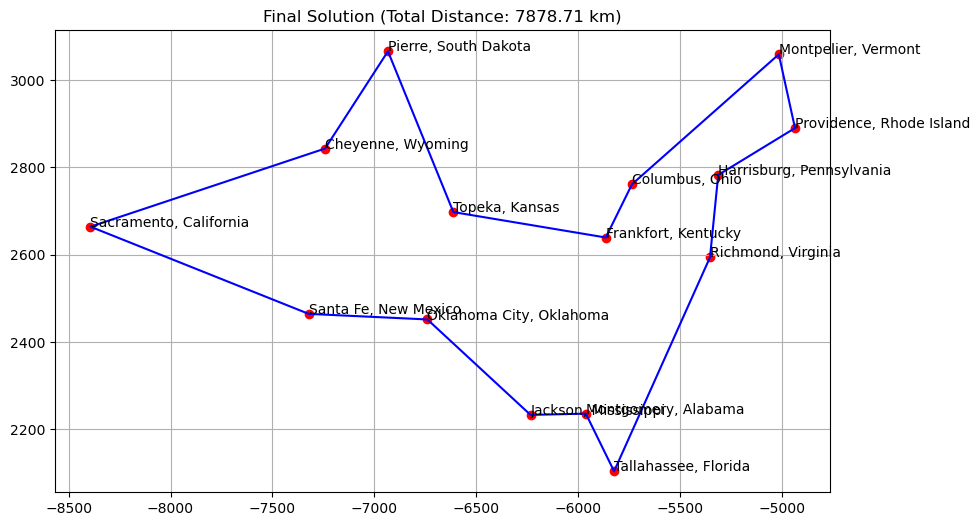

In [59]:
#Run and visualize
def visualize_solution(coordinates, solution, title, city_names):
    ordered_coordinates = [coordinates[i] for i in solution]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(*zip(*coordinates), c='red')
    
    for i, coord in enumerate(ordered_coordinates):
        plt.annotate(city_names[solution[i]], coord)
        
  
        
    # Connect all the points in the order of the solution
    plt.plot(*zip(*ordered_coordinates), c='blue')
    
    # Connect the last point to the first point
    plt.plot([coordinates[solution[-1]][0], coordinates[solution[0]][0]], 
             [coordinates[solution[-1]][1], coordinates[solution[0]][1]], 
             c='blue')
    
    plt.title(title)
    plt.grid()
    plt.show()
    


# Calculate the initial distance and display it
initial_solution = list(range(len(coordinates)))
initial_distance = sum(distance_matrix[initial_solution[i]][initial_solution[(i + 1) % len(initial_solution)]] for i in range(len(initial_solution)))
initial_distance = round(initial_distance, 2)
print(f"Initial Distance: {initial_distance}")

# Visualize initial solution
visualize_solution(coordinates, initial_solution, f'Final Solution (Total Distance: {initial_distance:.2f} km)', selected_cities)

# Run the Simulated Annealing algorithm
initial_temperature = 10000
cooling_rate = 0.995
final_solution, final_distance, iterations = simulated_annealing(distance_matrix, initial_temperature, cooling_rate)

# Display the final distance
final_distance = round(final_distance, 2)
print(f"Final Distance: {final_distance}")
print(f"Number of iterations: {iterations}")

# Visualize final solution
visualize_solution(coordinates, final_solution, f'Final Solution (Total Distance: {final_distance:.2f} km)', selected_cities)